# Predicting heart disease using machine learning

  

> This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.



We're going to take the following approach:

1. Problem definition 
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## Data Dictionary

1) id: unique identifier\
2) gender: "Male", "Female" or "Other"\
3) age: age of the patient\
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension\
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease\
6) ever_married: "No" or "Yes"\
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"\
8) Residence_type: "Rural" or "Urban"\
9) avg_glucose_level: average glucose level in blood\
10) bmi: body mass index\
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*\
12) stroke: 1 if the patient had a stroke or 0 if not

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#Models from Scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score



In [4]:
df = pd.read_csv("heart-disease.csv")

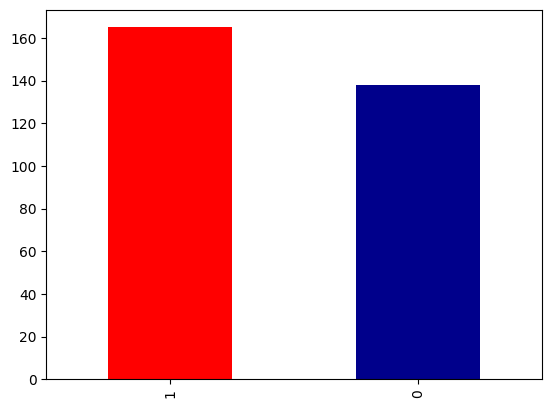

In [5]:
df["target"].value_counts().plot(kind="bar", color=["red","darkblue"]);

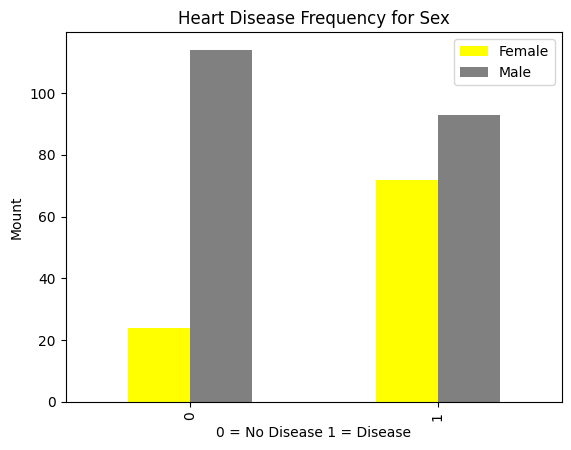

In [6]:
pd.crosstab(df.target, df.sex).plot(kind = "bar",
                                    color = ["yellow", "gray"])

plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease 1 = Disease")
plt.ylabel("Mount")
plt.legend(["Female", "Male"]);

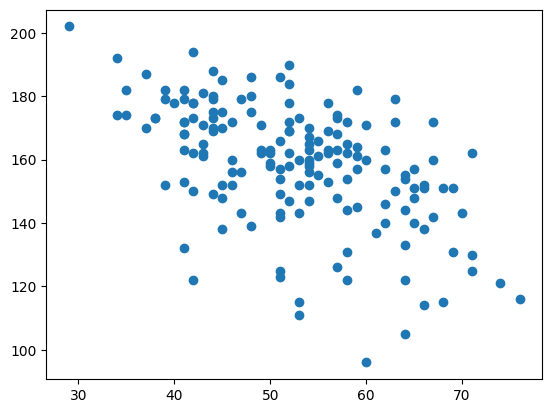

In [7]:
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1]);

(14.5, -0.5)

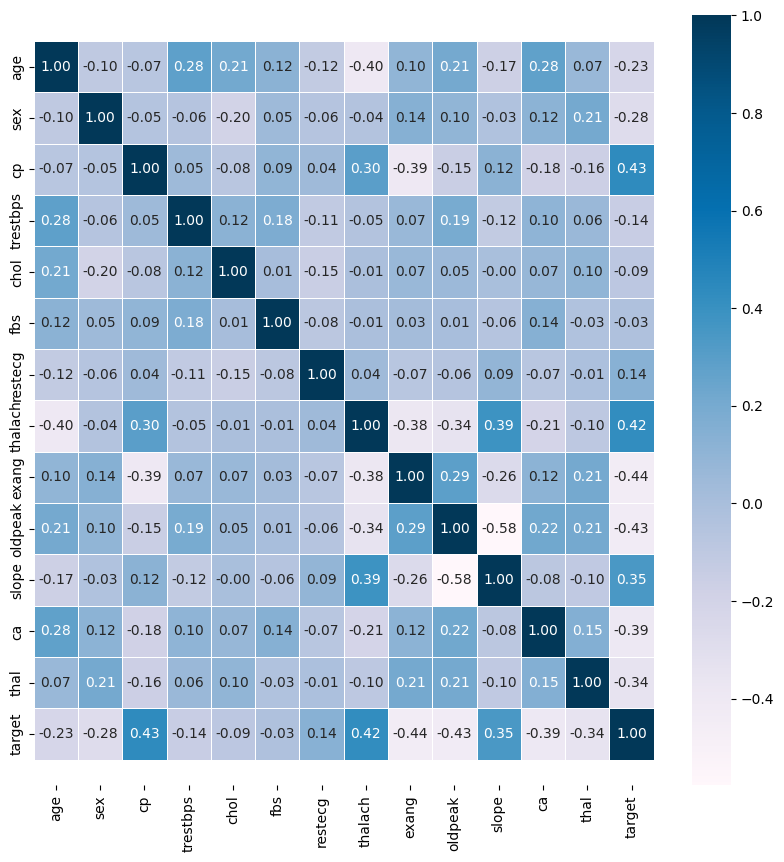

In [8]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="PuBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [9]:
X = df.drop("target",axis = 1)
y = df["target"]

In [10]:
np.random.seed()

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [11]:
models = {"Logistic Rehression" : LogisticRegression(),
          "KNN" : KNeighborsClassifier(),
          "Random Forest" : RandomForestClassifier()}

def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed()
    model_scores = {}
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores   

In [12]:
model_scores = fit_and_score(models = models,
                            X_train = X_train,
                            X_test = X_test,
                            y_train = y_train,
                            y_test = y_test)

model_scores

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Rehression': 0.8360655737704918,
 'KNN': 0.6229508196721312,
 'Random Forest': 0.7868852459016393}

<Axes: >

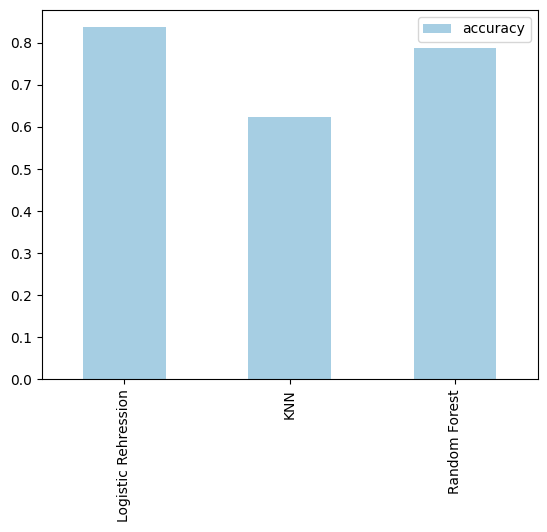

In [13]:
model_compare = pd.DataFrame(model_scores, index = ["accuracy"])
model_compare.T.plot.bar(colormap='Paired')

## Hyperparameter tuning (by hand)

In [14]:
train_scores = []
test_scores = []
# Create a list of differnt values for n_neighbors
neighbors = range(1, 21)
knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

Maximum KNN score on the test data: 62.30%


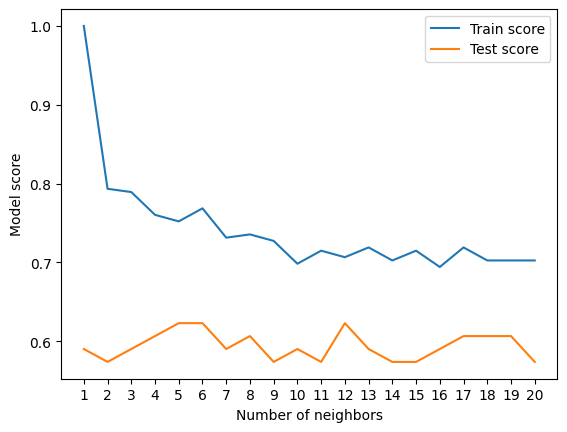

In [15]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

## Hyperparameter tuning (RandomizedSearhCV)

In [16]:
Logistic_Regression_Grid = {"C": np.logspace(-4,4,20),
                            "solver" : ["liblinear"]}

Random_Forest_Grid = {"n_estimators" : np.arange(10,1000,50),
                      "max_depth": [None, 3,5,10],
                      "min_samples_split": np.arange(2,20,2),
                      "min_samples_leaf": np.arange(1,20,2)}

In [17]:
np.random.seed()

RandomizedSearch_Logistic_Regression = RandomizedSearchCV(LogisticRegression(),
                                      param_distributions=Logistic_Regression_Grid,
                                      cv = 5,
                                      n_iter = 20,
                                      verbose = True)

RandomizedSearch_Logistic_Regression.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [18]:
RandomizedSearch_Logistic_Regression.score(X_test, y_test)

0.8360655737704918

In [19]:
np.random.seed(42)
RandomizedSearch_RandomForest = RandomizedSearchCV(RandomForestClassifier(),
                                param_distributions=Random_Forest_Grid,
                                cv = 5,
                                n_iter = 20,
                                verbose = True)
RandomizedSearch_RandomForest.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [20]:
RandomizedSearch_RandomForest.score(X_test, y_test)

0.7868852459016393

## Hyperparameter GridSearchCV

In [21]:
LogisticRegression_GridSearch = {"C": np.logspace(-4, 4, 30),
                                 "solver": ["liblinear"]}

GridSearch_LogisticRegression = GridSearchCV(LogisticRegression(),
                          param_grid=LogisticRegression_GridSearch,
                          cv=5,
                          verbose=True)
GridSearch_LogisticRegression.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [22]:
GridSearch_LogisticRegression.score(X_test, y_test)

0.8360655737704918

In [23]:
y_preds = GridSearch_LogisticRegression.predict(X_test)


##Evaluting our tuned machine learning classifier

In [24]:
print(confusion_matrix(y_test, y_preds))

[[24  8]
 [ 2 27]]


In [25]:
GridSearch_LogisticRegression.best_params_

{'C': 0.38566204211634725, 'solver': 'liblinear'}

In [26]:
classifier = LogisticRegression(C=0.38566204211634725,
                         solver="liblinear")

In [27]:
cross_val_acc = cross_val_score(classifier,
                      X,
                      y,
                      cv=5,
                      scoring="accuracy")

In [28]:
cross_val_acc = np.mean(cross_val_acc)

In [29]:
cross_val_precision = cross_val_score(classifier,
                                      X,
                                      y,
                                      cv=5,
                                      scoring="precision")
cross_val_precision=np.mean(cross_val_precision)

In [30]:
cross_val_recall = cross_val_score(classifier,
                            X,
                            y,
                            cv=5,
                            scoring="recall")
cross_val_recall = np.mean(cross_val_recall)

In [31]:
cross_val_f1 = cross_val_score(classifier,
                                X,
                                y,
                                cv=5,
                                scoring="f1")
cross_val_f1 = np.mean(cross_val_f1)

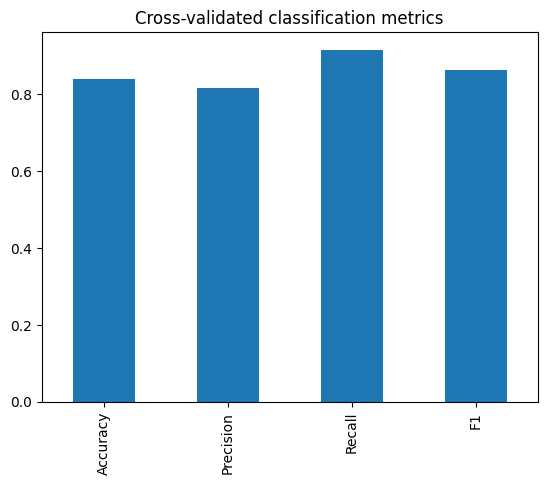

In [32]:
cross_val_metrics = pd.DataFrame({"Accuracy": cross_val_acc,
                                  "Precision": cross_val_precision,
                                  "Recall": cross_val_recall,
                                  "F1": cross_val_f1},
                                  index=[0])

cross_val_metrics.T.plot.bar(title="Cross-validated classification metrics",
                            legend=False);